# Pymaceuticals Inc.
---

### Analysis

In this challenge we were tasked to analyze the data from a new pharmaceutical company that specializs in anti-cancer medications. The dataset contained information on 248 different mice. 

From the summary statistics, we found that mice treated with Ketapril had the greatest average tumor volume of 55.23 mm3, where as mice treated with Ramicane had the lowest average tumor volume of 40.21 mm3. Capomulin was the drug that treated the most amount of mice and Propriva was the drug that treated the least amount of mice. 51% of the treated mice were male.

The correlation between mouse weight and the average tumor volume for Capomulin treated mice was 0.84.

In [1]:
# Prepare the Data

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = 'left', on = "Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = combined_data["Mouse ID"].unique()
total_mice = len(unique_mice)
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_id_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_id) == False]
clean_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice = clean_combined_data["Mouse ID"].unique()
total_clean_unique_mice = len(clean_unique_mice)
total_clean_unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_summary = clean_combined_data.set_index(["Drug Regimen"])
drug_regimen_group_summary = drug_regimen_summary.groupby("Drug Regimen")
drug_regimen_mean = drug_regimen_group_summary["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_group_summary["Tumor Volume (mm3)"].median()
drug_regimen_var = drug_regimen_group_summary["Tumor Volume (mm3)"].var()
drug_regimen_std = drug_regimen_group_summary["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen_group_summary["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary_data = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                          "Median Tumor Volume": drug_regimen_median,
                                          "Tumor Volume Varience": drug_regimen_var,
                                          "Tumor Volume Std. Dev.": drug_regimen_std,
                                          "Tumor Volume Std. Err.": drug_regimen_sem})
drug_regimen_summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_summary_data = clean_combined_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_regimen_summary_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Total Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

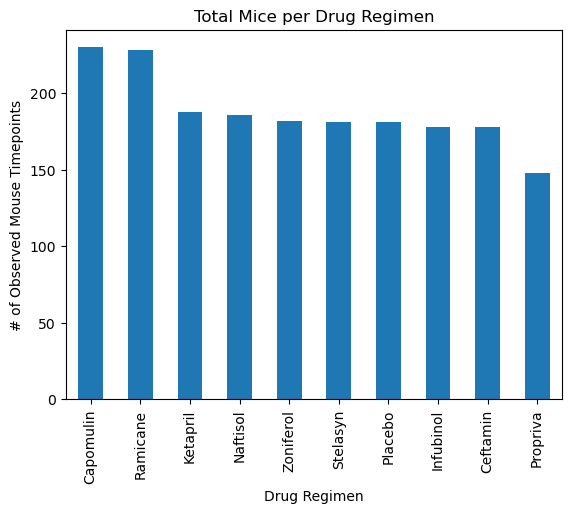

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a dataset that only contains Drug Regimen and Timepoint columns
mice_regimen = clean_combined_data[["Drug Regimen", "Timepoint"]]
mice_regimen.head()
#Create a variable to count the total amount of mice in using each drug regimen
mice_regimen_count = mice_regimen["Drug Regimen"].value_counts()
mice_regimen_count
# Pandas barplot
pandasplot = mice_regimen_count.plot(
                   kind = "bar",
                   xlabel = "Drug Regimen",
                   ylabel = "# of Observed Mouse Timepoints",
                   title = "Total Mice per Drug Regimen")
pandasplot


Text(0.5, 1.0, 'Total Mice per Drug Regimen')

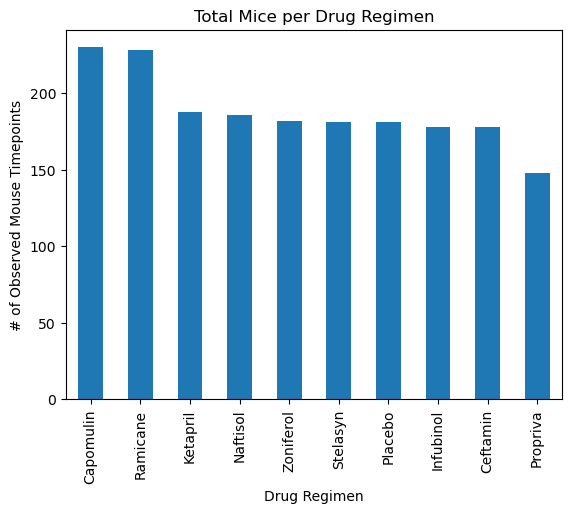

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_regimen_plot = mice_regimen_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Mice per Drug Regimen")

<Axes: ylabel='Sex'>

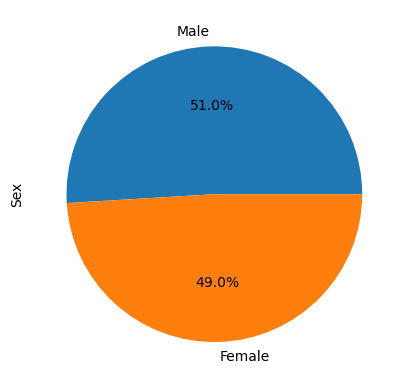

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pandas = clean_combined_data["Sex"].value_counts()
sex_pandas.plot(kind = "pie",
               autopct = "%1.1f%%",
               ylabel = "Sex")


Text(0, 0.5, 'Sex')

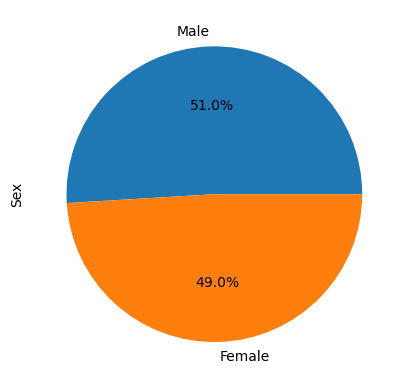

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label_sex = sex_pandas.index.values
sex_pandas_count = sex_pandas.values
sex_pandas.plot.pie(labels = label_sex, autopct = "%1.1f%%")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin") | 
                                         (clean_combined_data["Drug Regimen"] == "Ramicane") |
                                         (clean_combined_data["Drug Regimen"] == "Infubinol") | 
                                         (clean_combined_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = treatment_data.groupby(["Drug Regimen", "Mouse ID"]).last()
greatest_timepoint.head()

greatest_timepoint_reset = greatest_timepoint.reset_index()
greatest_timepoint_reset.head()

treatment_timepoint = greatest_timepoint_reset[["Drug Regimen", "Tumor Volume (mm3)"]]
treatment_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_data = treatment_timepoint.loc[treatment_timepoint["Drug Regimen"] == "Capomulin"]
ramicane_data = treatment_timepoint.loc[treatment_timepoint["Drug Regimen"] == "Ramicane"]
infubinol_data = treatment_timepoint.loc[treatment_timepoint["Drug Regimen"] == "Infubinol"]
ceftamin_data = treatment_timepoint.loc[treatment_timepoint["Drug Regimen"] == "Ceftamin"]

clean_tumor_data = pd.DataFrame({
    "Capomulin": capomulin_data["Tumor Volume (mm3)"],
    "Ramicane": ramicane_data["Tumor Volume (mm3)"],
    "Infubinol": infubinol_data["Tumor Volume (mm3)"],
    "Ceftamin": ceftamin_data["Tumor Volume (mm3)"]
})


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
for drug in treatment_timepoint["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
lower_quart = []
upper_quart = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
for drug in treatments:
    quartile = clean_tumor_data[drug].quantile([.25, .5, .75])
    lowerquart = quartile[.25]
    upperquart = quartile[.75]
    iqr = upperquart - lowerquart
    lower_quart.append(lowerquart)
    upper_quart.append(upperquart)
    lower_bound_out = lowerquart - (1.5 * iqr)
    upper_bound_out = upperquart + (1.5 * iqr)
    print(f"---------------------------- \n For mice treated with {drug}: \n IQR = {iqr} \n Lower Quartile = {lowerquart} \n Upper Quartile = {upperquart} \n Values below {lower_bound_out} could be outliers \n Values above {upper_bound_out} could be outliers")
     


---------------------------- 
 For mice treated with Capomulin: 
 IQR = 7.781863460000004 
 Lower Quartile = 32.37735684 
 Upper Quartile = 40.1592203 
 Values below 20.70456164999999 could be outliers 
 Values above 51.83201549 could be outliers
---------------------------- 
 For mice treated with Ceftamin: 
 IQR = 15.577752179999997 
 Lower Quartile = 48.72207785 
 Upper Quartile = 64.29983003 
 Values below 25.355449580000002 could be outliers 
 Values above 87.66645829999999 could be outliers
---------------------------- 
 For mice treated with Infubinol: 
 IQR = 11.477135160000003 
 Lower Quartile = 54.04860769 
 Upper Quartile = 65.52574285 
 Values below 36.83290494999999 could be outliers 
 Values above 82.74144559000001 could be outliers
---------------------------- 
 For mice treated with Ramicane: 
 IQR = 9.098536719999998 
 Lower Quartile = 31.56046955 
 Upper Quartile = 40.65900627 
 Values below 17.912664470000003 could be outliers 
 Values above 54.30681135 could be outl

Text(0, 0.5, 'Final Tumor Volume (mm3)')

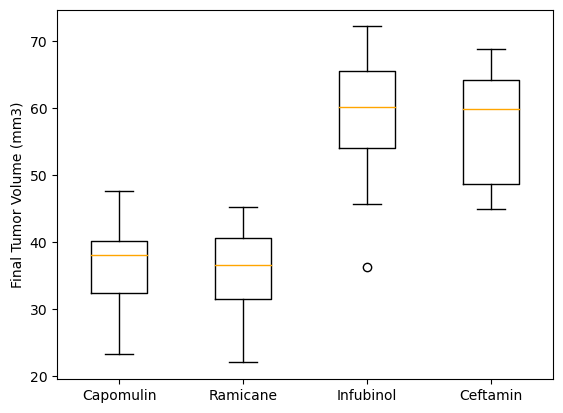

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_boxplot = clean_tumor_data.boxplot(grid = False ,
                                        color = dict(boxes = "black",
                                                     whiskers = "black",
                                                     medians = "orange"))
tumor_boxplot.set_ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

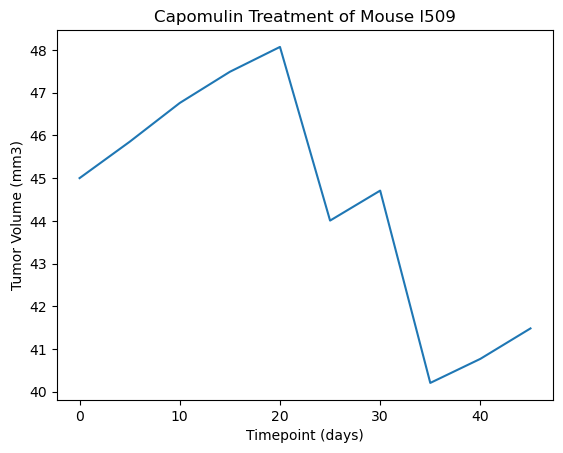

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_1509 = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin") & (clean_combined_data["Mouse ID"] == "l509") ]
capo_1509

plt.plot(capo_1509["Timepoint"], capo_1509["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

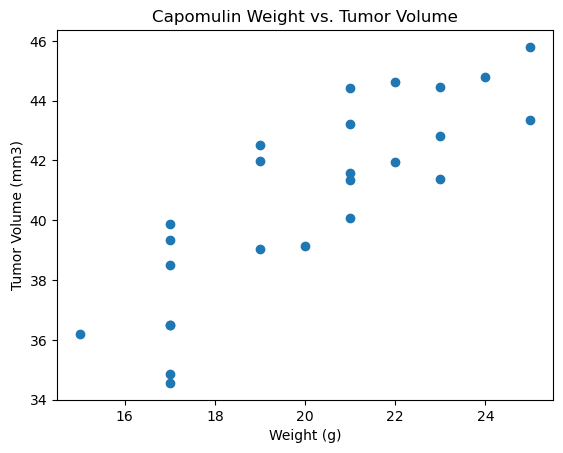

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin")].groupby("Mouse ID")

# Create a new variable for the average observed tumor volume
avg_tumor = capo[("Tumor Volume (mm3)")].mean()
avg_weight = capo["Weight (g)"].mean()

plt.scatter(avg_weight, avg_tumor)
plt.title("Capomulin Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume for Capomulin treated mice is 0.84.


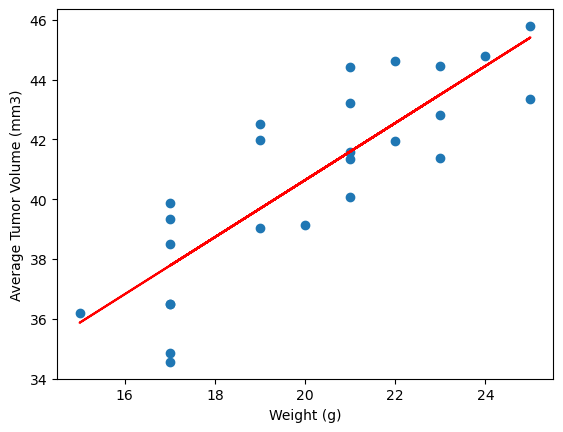

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_co = st.pearsonr(avg_weight, avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume for Capomulin treated mice is {round(correlation_co[0], 2)}.")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regression = avg_weight * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight, avg_tumor)
plt.plot(avg_weight,regression,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

